## Brain Tumor Detection

#### Reading the header files

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory

#### Importing the folders

In [2]:
import os
for dirname, _, filenames in os.walk('C:\\workspace\\Brain tumor\\brain_tumor_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

C:\workspace\Brain tumor\brain_tumor_dataset\no\1 no.jpeg
C:\workspace\Brain tumor\brain_tumor_dataset\yes\Y1.jpg


In [3]:
folder_path_no = "C:\\workspace\\Brain tumor\\brain_tumor_dataset\\no"
folder_path_yes = "C:\\workspace\\Brain tumor\\brain_tumor_dataset\\yes"

f_no = os.listdir(folder_path_no)
f_yes = os.listdir(folder_path_yes)

print(len(f_no))
print(len(f_yes))

98
155


In [4]:
no_label = [0]*len(f_no)
yes_label = [1]*len(f_yes)

labels = no_label + yes_label
print(len(labels))

253


#### 0 represents that tumor does not exist and 1 represents tumor exists.

In [5]:
print(labels[:5])
print(labels[-5:])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [6]:
data = []

for img in f_no:
    image = Image.open( "C:\\workspace\\Brain tumor\\brain_tumor_dataset\\no\\" + img )
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

for img in f_yes:
    image = Image.open( "C:\\workspace\\Brain tumor\\brain_tumor_dataset\\yes\\"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

In [7]:
len(data)

253

In [8]:
data[0].shape

(224, 224, 3)

In [9]:
x = np.array(data)
y = np.array(labels)

In [10]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227, 224, 224, 3)
(26, 224, 224, 3)
(227,)
(26,)


In [13]:
x_train[0]


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [14]:
y_train

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0])

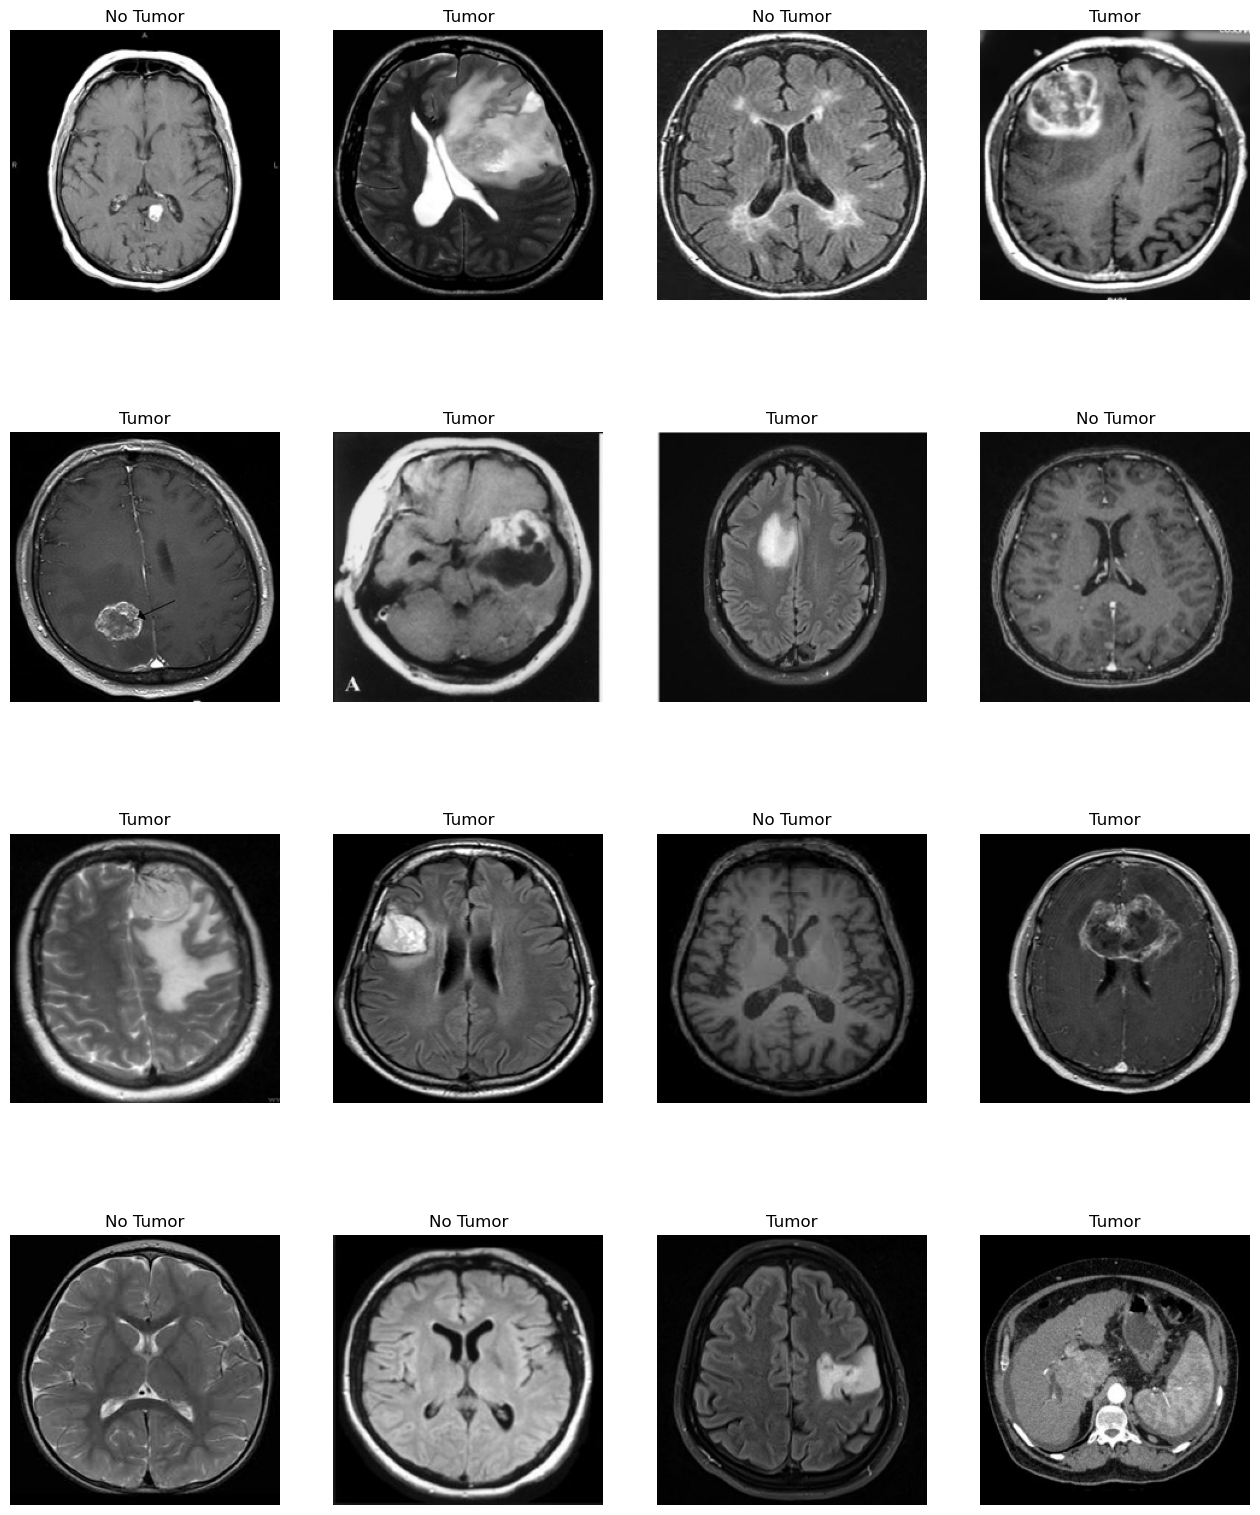

In [15]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"{class_labels[y_train[i]]}")
    plt.axis("off")

In [16]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [24]:
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(filters=80,kernel_size=(3,3),padding="valid", strides=(1,1) ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="valid", strides=(1,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(filters=34,kernel_size=(3,3),padding="valid", strides=(1,1), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

from tensorflow.keras.callbacks import ModelCheckpoint

# Define a callback to save the model
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True)

model.compile(optimizer="adam", loss="binary_crossentropy",
             metrics=["accuracy"])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 80)      2240      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 80)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      46144     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_3 (Dense)             (None, 500)              

In [25]:
history = model.fit(x_train_scaled, y_train, epochs=20,
                   validation_data=(x_test_scaled,y_test))  # batch_size=32

Epoch 1/20
8/8 [==============================] - 30s 3s/step - loss: 1.9952 - accuracy: 0.5551 - val_loss: 0.5519 - val_accuracy: 0.8846
Epoch 2/20
8/8 [==============================] - 21s 3s/step - loss: 0.5803 - accuracy: 0.7577 - val_loss: 0.3045 - val_accuracy: 0.9231
Epoch 3/20
8/8 [==============================] - 27s 3s/step - loss: 0.4721 - accuracy: 0.8238 - val_loss: 0.4036 - val_accuracy: 0.8462
Epoch 4/20
8/8 [==============================] - 26s 3s/step - loss: 0.3665 - accuracy: 0.8370 - val_loss: 0.2343 - val_accuracy: 0.9615
Epoch 5/20
8/8 [==============================] - 22s 3s/step - loss: 0.2180 - accuracy: 0.9295 - val_loss: 0.2422 - val_accuracy: 0.9615
Epoch 6/20
8/8 [==============================] - 21s 3s/step - loss: 0.1177 - accuracy: 0.9648 - val_loss: 0.3584 - val_accuracy: 0.9231
Epoch 7/20
8/8 [==============================] - 24s 3s/step - loss: 0.0764 - accuracy: 0.9692 - val_loss: 0.3390 - val_accuracy: 0.9615
Epoch 8/20
8/8 [==================

1/1 [==============================] - 1s 537ms/step - loss: 0.9958 - accuracy: 0.9615
Accuracy on Test Data: 0.9615384340286255


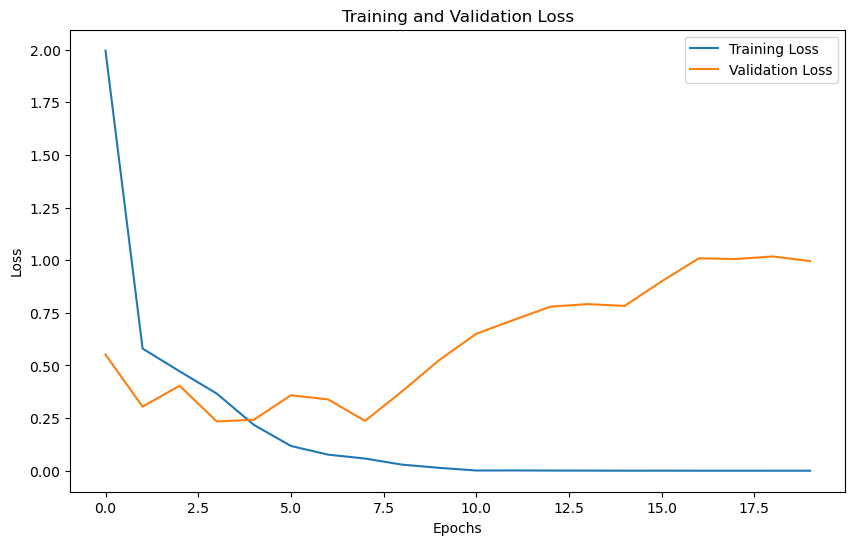

In [26]:
loss, acc = model.evaluate(x_test_scaled,y_test)
print("Accuracy on Test Data:",acc)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
y_pred = model.predict(x_test_scaled)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]

y_pred[:6]

1/1 [==============================] - 1s 680ms/step


[1, 0, 1, 0, 0, 0]

In [21]:
print(y_test[:10])   # Actual Label
print(y_pred[:10])  # Predicted Label

[1 0 1 0 0 0 0 1 1 1]
[1, 0, 1, 0, 0, 0, 0, 1, 1, 1]


Confusion Matrix:
 [[ 7  1]
 [ 0 18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.95      1.00      0.97        18

    accuracy                           0.96        26
   macro avg       0.97      0.94      0.95        26
weighted avg       0.96      0.96      0.96        26



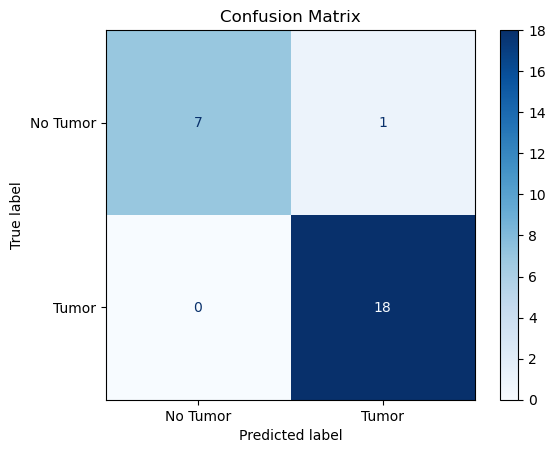

Classification Report:
              precision    recall  f1-score   support

    No Tumor       1.00      0.88      0.93         8
       Tumor       0.95      1.00      0.97        18

    accuracy                           0.96        26
   macro avg       0.97      0.94      0.95        26
weighted avg       0.96      0.96      0.96        26



In [22]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# Convert predicted probabilities to binary class labels (0 or 1)
y_pred_binary = np.round(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Tumor", "Tumor"])
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()

# You can also print a classification report for additional metrics
classification_rep = classification_report(y_test, y_pred_binary, target_names=["No Tumor", "Tumor"])
print("Classification Report:")
print(classification_rep)


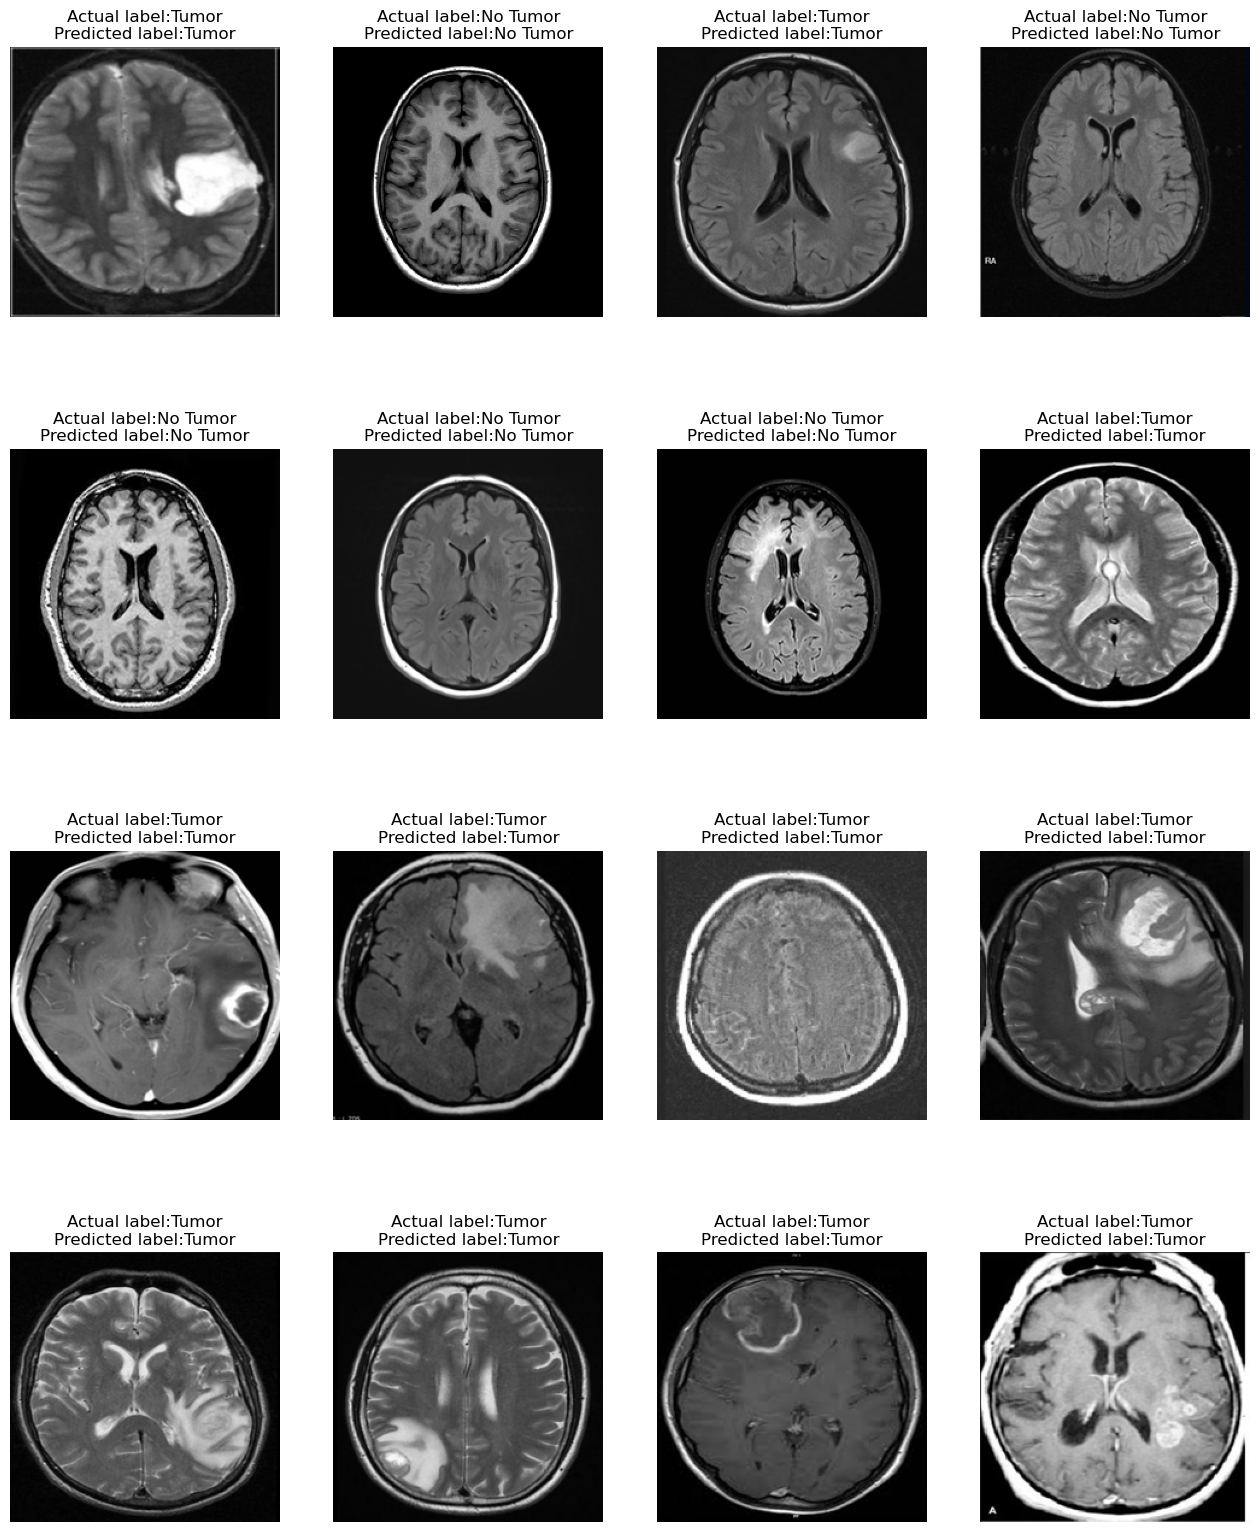

In [23]:
import matplotlib.pyplot as plt
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual label:{class_labels[y_test[i]]}\nPredicted label:{class_labels[y_pred[i]]}")
    plt.axis("off")

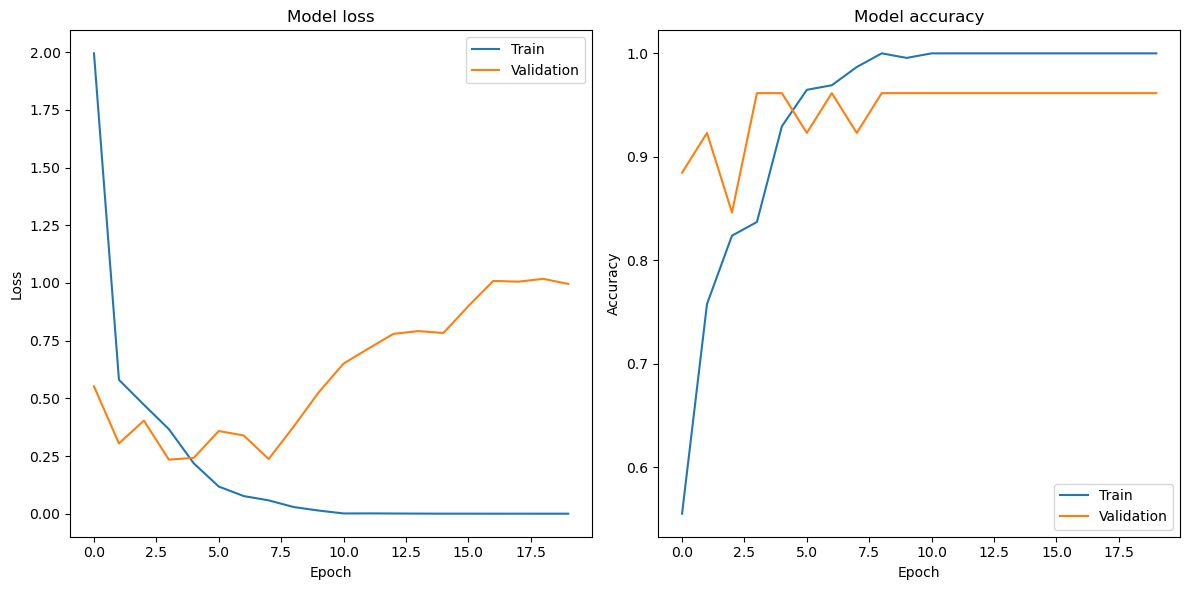

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


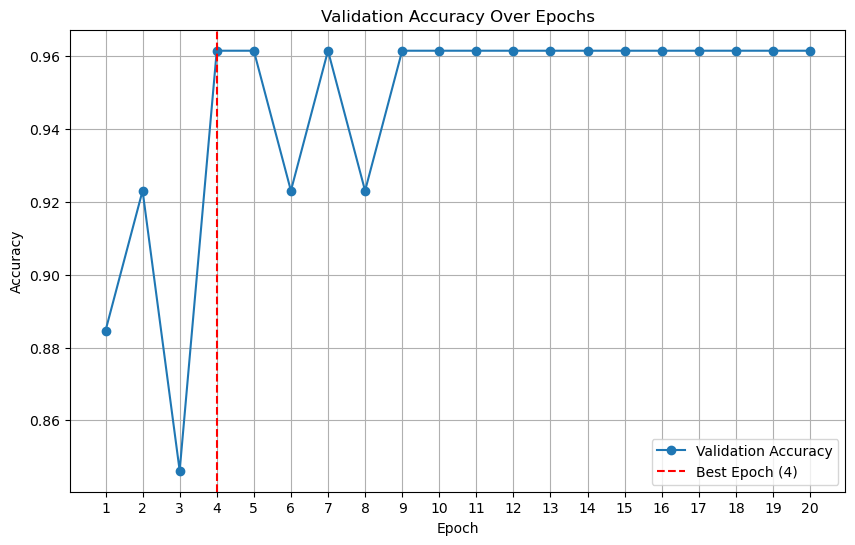

In [28]:
# Get the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy)) + 1  # Adding 1 to convert to 1-based index

# Create a list of epochs
epochs = range(1, len(train_accuracy) + 1)

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.xticks(epochs)
plt.axvline(best_epoch, color='red', linestyle='--', label=f'Best Epoch ({best_epoch})')
plt.legend()
plt.grid(True)

plt.show()
